# Simple Linear Programming Example 
In this notebook we are going to dig into the basics of optimization underpinning PESTPP-OPT (and to an extent, PESTPP-MOU) through a very simple linear programming example, reproduced from https://realpython.com/linear-programming-python/ 


In [49]:
import os
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from scipy.optimize import linprog

# First, some optimization terminology 
- __parameter__: an uncertain model input whose value we want to estimate and whose uncertainty we want to propagate to important model outputs.
- __decision variable__: a model input whose value can be "controlled" by human activity.  For example, groundwater extraction rates or surface-water structure operations.  Like a parameter, a decision variable also influences important model outputs.
- __constraint__: an uncertain model output whose real-world equivalent value has a range of "undesired values".  In management optimization, "constraints" are typically "inequality" constraints, meaning the constraint can take any value other than the undesired values.  Think "surface-water/groundwater exchange flux must be greater than XXX to support ecological flows".
- __objective function__: a (potentially nonlinear) function of the decision variables that is to be maximized or minimized, depending on the problem.  For example, in the case of groundwater extraction, the objective is to maximize the volume of groundwater extracted (subject to not violating the constraints).

# Problem Setup
Let's set up a linear optimization problem where we seek to maximize __z__ given the objective function equation in black below. The two decision variables are __x__ and __y__. The decision variables are subject to a bound constraint, where they both must be equal or greater to zero. The linear combination of x and y is also subject to three constraint equations, shown in red, blue, and yellow. 

![lp](lp-py-eq-2.png)

Conveniently, we can visualize the five constraints on a 2-d plot, where the white space is the feasible region. Woops, that's another key optimization term! 
- __feasible__:a set of decision variables that satisfies all constraints


Text(3.5, 3, 'feasible region')

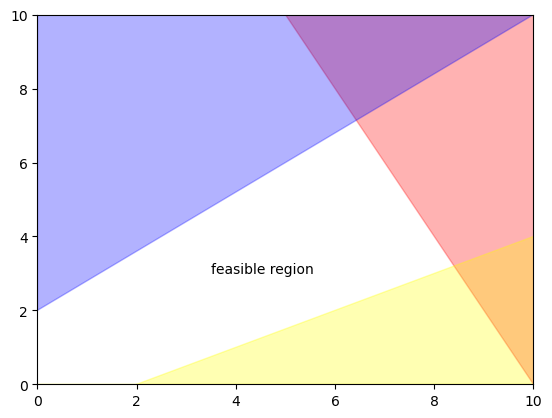

In [50]:
x = np.linspace(0,1000)
y = 20 - 2*x
plt.fill_between(x, y,1000, color='red', alpha=0.3)

x = np.linspace(0,1000)
y = (10 + 4*x)/5
plt.fill_between(x, y,1000, color='blue', alpha=0.3)

x = np.linspace(0,1000)
y = (-2 + x)/2
plt.fill_between(x, y, color='yellow', alpha=0.3)

plt.xlim(0,10)
plt.ylim(0,10)
plt.text(3.5,3,'feasible region')

## Now, let's set up and solve the optimization problem.

In [51]:
obj = [-1, -2]
#wait why does z= x+2y have coefficients of -1 and -2 instead of 1 and 2? 
#because scipy linprog assumes minimization. to "maximize," we flip them to negative

lhs_ineq = [[ 2,  1],  # Red constraint left side
             [-4,  5],  # Blue constraint left side
             [ 1, -2]]  # Yellow constraint left side 
#(again, note that coefficient signs are flipped because it's a greater than constraint rather than less than)

rhs_ineq = [20,  # Red constraint right side
            10,  # Blue constraint right side
            -2]  # Yellow constraint right side

In [52]:
bnd = [(0, float("inf")),  # Bounds of x
        (0, float("inf"))]  # Bounds of y

In [53]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
               bounds=bnd, method="simplex")

We can print the objective function value. 

In [54]:
opt.fun 

-20.714285714285715

And check to see if an optimal solution (value of x and y) was found

In [55]:
opt.success 

True

Let's print out the decision variable values for that optimal solution

In [56]:
opt.x 

array([6.42857143, 7.14285714])

And we can visualize those decision variable values on our plot.

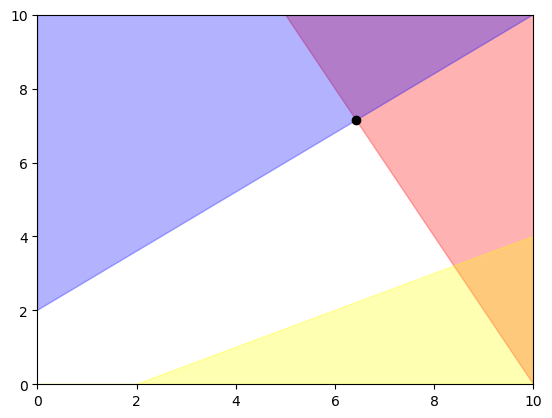

In [57]:
x = np.linspace(0,1000)
y = 20 - 2*x
plt.fill_between(x, y,1000, color='red', alpha=0.3)

x = np.linspace(0,1000)
y = (10 + 4*x)/5
plt.fill_between(x, y,1000, color='blue', alpha=0.3)

x = np.linspace(0,1000)
y = (-2 + x)/2
plt.fill_between(x, y, color='yellow', alpha=0.3)

plt.xlim(0,10)
plt.ylim(0,10)

plt.scatter(opt.x[0],opt.x[1],c='black')

Notice that the solution is in the feasible region but right at the boundary of two of the constraints. This is where optimization departs from parameter estimation, as it is normal and even optimal for parameters to hit their bounds. 

## What if we further bounded the decision variables x and y?

In [58]:
bnd = [(0, 3),  # Bounds of decision variable x
        (0, 4)]  # Bounds of decision variable y

In [59]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
               bounds=bnd, method="simplex")

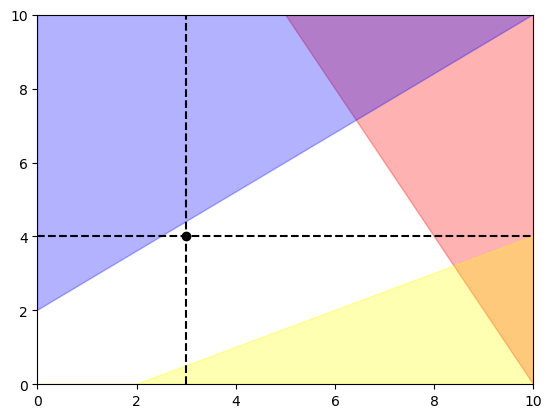

In [60]:
x = np.linspace(0,1000)
y = 20 - 2*x
plt.fill_between(x, y,1000, color='red', alpha=0.3)

x = np.linspace(0,1000)
y = (10 + 4*x)/5
plt.fill_between(x, y,1000, color='blue', alpha=0.3)

x = np.linspace(0,1000)
y = (-2 + x)/2
plt.fill_between(x, y, color='yellow', alpha=0.3)

plt.xlim(0,10)
plt.ylim(0,10)

plt.axvline(bnd[0][1],ls='--',c='black')
plt.axhline(bnd[1][1],ls='--',c='black')

plt.scatter(opt.x[0],opt.x[1],c='black')

Now, the optimal solution is entirely constrained by the bounded values of the decision variables. Thus, in linear optimization, the constraints are key and decision variable bounds should be carefully designed. For example, for maximizing pumping subject to the constraint of not capturing too much streamflow, we still want to set bounds on our pumping wells based on actual pump capacity and yield. 